In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
traffic_csv = 'traffic.csv'
traffic_data = pd.read_csv(traffic_csv)
traffic_data.head(10)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,1.677862e+09,20.198.119.84:443,192.168.100.23:11895,TCP,66,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
1,2,1.677862e+09,192.168.100.23:11895,20.198.119.84:443,TCP,54,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
2,3,1.677862e+09,192.168.100.23:62518,118.98.44.100:53,UDP,80,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
3,4,1.677862e+09,192.168.100.23:62305,118.98.44.100:53,UDP,80,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
4,5,1.677862e+09,118.98.44.100:53,192.168.100.23:62305,UDP,328,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
5,6,1.677862e+09,118.98.44.100:53,192.168.100.23:62518,UDP,225,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
6,7,1.677862e+09,192.168.100.23:12070,52.21.119.163:443,TCP,66,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
7,8,1.677862e+09,52.21.119.163:443,192.168.100.23:12070,TCP,66,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
8,9,1.677862e+09,192.168.100.23:12070,52.21.119.163:443,TCP,54,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
9,10,1.677862e+09,192.168.100.23:12070,52.21.119.163:443,TCP,428,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...


In [3]:
sources = traffic_data.groupby("Source").Source.count()
sources.sort_values()

Source
192.168.100.23:11895     1
192.168.100.23:50408     1
192.168.100.23:58178     1
192.168.100.23:62305     1
192.168.100.23:62518     1
20.198.119.84:443        1
118.98.44.100:53         4
192.168.100.23:12070     9
192.168.100.23:12071     9
192.168.100.23:12072     9
52.21.119.163:443       27
Name: Source, dtype: int64

In [4]:
destinations = traffic_data.groupby("Destination").Source.count()
destinations.sort_values()

Destination
192.168.100.23:11895     1
192.168.100.23:50408     1
192.168.100.23:58178     1
192.168.100.23:62305     1
192.168.100.23:62518     1
20.198.119.84:443        1
118.98.44.100:53         4
192.168.100.23:12070     9
192.168.100.23:12071     9
192.168.100.23:12072     9
52.21.119.163:443       27
Name: Source, dtype: int64

In [5]:
protocols = traffic_data.groupby("Protocol").Source.count()
protocols.sort_values()

Protocol
UDP     8
TCP    56
Name: Source, dtype: int64

In [6]:
network = nx.from_pandas_edgelist(
    df = traffic_data,
    source = 'Source',
    target = 'Destination',
    edge_attr = True
)

network.nodes()

NodeView(('20.198.119.84:443', '192.168.100.23:11895', '192.168.100.23:62518', '118.98.44.100:53', '192.168.100.23:62305', '192.168.100.23:12070', '52.21.119.163:443', '192.168.100.23:58178', '192.168.100.23:12071', '192.168.100.23:50408', '192.168.100.23:12072'))

In [7]:
network.edges()

EdgeView([('20.198.119.84:443', '192.168.100.23:11895'), ('192.168.100.23:62518', '118.98.44.100:53'), ('118.98.44.100:53', '192.168.100.23:62305'), ('118.98.44.100:53', '192.168.100.23:58178'), ('118.98.44.100:53', '192.168.100.23:50408'), ('192.168.100.23:12070', '52.21.119.163:443'), ('52.21.119.163:443', '192.168.100.23:12071'), ('52.21.119.163:443', '192.168.100.23:12072')])

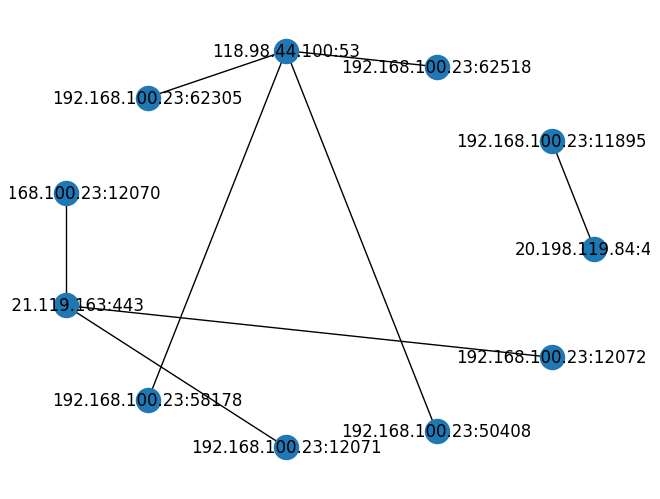

In [8]:
nx.draw_circular(network, with_labels = True)

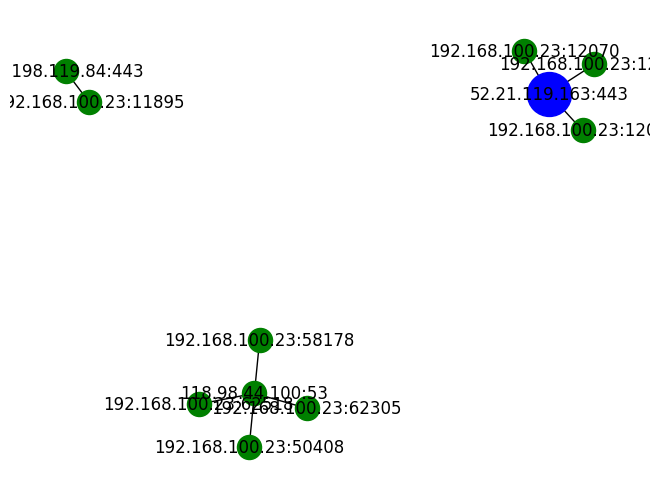

In [10]:
addr = '52.21.119.163:443'
pos = nx.spring_layout(network)
nx.draw(
    network, pos,
    node_color = 'green',
    node_size = 300,
    with_labels = True
)

options = {
    "node_size": 1000,
    "node_color": "b"
}

nx.draw_networkx_nodes(network, pos, nodelist = [addr], **options)

plt.show()

In [11]:
traffic_data.loc[traffic_data['Source'] == addr]

,No.,Time,Source,Destination,Protocol,Length,Info
7,8,1.677862e+09,52.21.119.163:443,192.168.100.23:12070,TCP,66,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
10,11,1.677862e+09,52.21.119.163:443,192.168.100.23:12070,TCP,54,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
11,12,1.677862e+09,52.21.119.163:443,192.168.100.23:12070,TCP,1466,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
12,13,1.677862e+09,52.21.119.163:443,192.168.100.23:12070,TCP,1466,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
14,15,1.677862e+09,52.21.119.163:443,192.168.100.23:12070,TCP,1466,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
15,16,1.677862e+09,52.21.119.163:443,192.168.100.23:12070,TCP,535,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
18,19,1.677862e+09,52.21.119.163:443,192.168.100.23:12070,TCP,335,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
19,20,1.677862e+09,52.21.119.163:443,192.168.100.23:12070,TCP,54,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
23,24,1.677862e+09,52.21.119.163:443,192.168.100.23:12070,TCP,54,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
27,28,1.677862e+09,52.21.119.163:443,192.168.100.23:12071,TCP,66,Layer FRAME:\r\r\n\tInterface id: 0 (\Device\N...
